In [18]:
import pandas as pd
import numpy as np
import re
from sklearn.feature_extraction.text import HashingVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import OneHotEncoder
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from sklearn.model_selection import train_test_split
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import accuracy_score, confusion_matrix
from matplotlib import pyplot as plt

In [2]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ritik.j\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
categories = pd.read_csv('./categories.csv')
categories_map = pd.read_excel('./category_mapping.xlsx', 'Sheet1')
new_article = pd.read_excel('./news_details.xlsx', 'Sheet1')

In [4]:
new_article['content'] = new_article['title'].str.cat(new_article['snippet'], na_rep = '', sep = "\n").str.cat(new_article['news_description'], na_rep = '', sep = '\n')

In [5]:
categories_map.head()

,news_id,category_id
0,5cb377684f646938b14a96f1_google,4
1,5cb426d44f646938b10bf6b6_google,4
2,5cb429984f646938b110f937_google,2
3,5cb426b34f646938b10bbeca_google,5
4,5cb426f74f646938b10c3857_google,7


In [6]:
categories.head()

,id,category
0,1,Layoff
1,2,Mergers and Acquisitions
2,3,Mass Hiring
3,4,Executive Movement
4,5,Centre Setup and Expansion


In [7]:
new_article = new_article.merge(categories_map, on = "news_id")

In [8]:
new_article.head()

,news_id,snippet,title,news_description,content,category_id
0,5cb377684f646938b14a96f1_google,"New Delhi: Bank of Baroda, which has become th...",Bank of Baroda to hire consultancy firm to eva...,NaN,Bank of Baroda to hire consultancy firm to eva...,4
1,5cb426d44f646938b10bf6b6_google,He said his plans would be discussed with the ...,Foxconn chairman Gou says he aims to step down...,TAIPEI (Reuters) - The chairman of Taiwan's Fo...,Foxconn chairman Gou says he aims to step down...,4
2,5cb429984f646938b110f937_google,ZF Friedrichshafen AG has announced that it ha...,ZF Finalizes USD 7 Billion Deal to Acquire WABCO,Share 0 Share 0\n\nZF Friedrichshafen AG has a...,ZF Finalizes USD 7 Billion Deal to Acquire WAB...,2
3,5cb426b34f646938b10bbeca_google,Zhejiang Geely Holding (ZGH) has begun constru...,Geely Begins Work On New Lotus Plant In China,Zhejiang Geely Holding (ZGH) has begun constru...,Geely Begins Work On New Lotus Plant In China\...,5
4,5cb426f74f646938b10c3857_google,KFH has partnered with IDEMIA to launch Kuwait...,KFH partners with IDEMIA's to launch metal pay...,NaN,KFH partners with IDEMIA's to launch metal pay...,7


In [9]:
new_article.isnull().sum()

news_id               0
snippet              11
title                 0
news_description    284
content               0
category_id           0
dtype: int64

In [10]:
data = new_article[['content', 'category_id']]

In [11]:
x_train, x_test, y_train, y_test = train_test_split(data['content'], data['category_id'], test_size = 0.2)

In [12]:
def clean_text(text):
    text = text.replace('\\n', '')
    text = re.sub('[^A-Za-z-]', ' ', text)
    text = [word for word in text.split() if len(word) > 2]
    return ' '.join(text)

## Model 1

Model consists of 
- Hashing Vectorization
- Logistic Regression for binomial classification

In [16]:
tokenizer = WhitespaceTokenizer()

hash_vec = HashingVectorizer(preprocessor = clean_text, 
                             stop_words=stopwords.words('english'), 
                             ngram_range= (1, 2),
                             tokenizer= lambda x: tokenizer.tokenize(x)
                            )

clf = OneVsRestClassifier(LogisticRegression( solver = 'lbfgs'))

pipeline1 = Pipeline(steps = [('hash_vec', hash_vec),
                 ('clf', clf)], verbose= True)

pipeline1.fit(x_train, y_train)

pred = pipeline1.predict(x_test)

print ("Accuracy of the model: %.3f"%(accuracy_score(y_test, pred)))

[Pipeline] .......... (step 1 of 2) Processing hash_vec, total=   6.8s
[Pipeline] ............... (step 2 of 2) Processing clf, total= 1.1min
Accuracy of the model: 0.903


## Model 2

- TFIDF Vectorization
- Logistic Regression with multinomial

In [23]:
tokenizer = WhitespaceTokenizer()

hash_vec = TfidfVectorizer(preprocessor = clean_text, 
                             stop_words=stopwords.words('english'), 
                             ngram_range= (1, 2),
                             tokenizer= lambda x: tokenizer.tokenize(x)
                            )

clf = OneVsRestClassifier(LogisticRegression(multi_class = 'multinomial', solver = 'lbfgs'))

pipeline2 = Pipeline(steps = [('hash_vec', hash_vec),
                 ('clf', clf)], verbose= True)

pipeline2.fit(x_train, y_train)

pred = pipeline2.predict(x_test)
print ("Accuracy of the model: %.3f"%(accuracy_score(y_test, pred)))

[Pipeline] .......... (step 1 of 2) Processing hash_vec, total=  11.2s
[Pipeline] ............... (step 2 of 2) Processing clf, total= 1.3min
Accuracy of the model: 0.917


## Model 3

Model with
- Hashing Vectorization
- Logistic Regression with multinomial 

In [24]:
tokenizer = WhitespaceTokenizer()

hash_vec = HashingVectorizer(preprocessor = clean_text, 
                             stop_words=stopwords.words('english'), 
                             ngram_range= (1, 2),
                             tokenizer= lambda x: tokenizer.tokenize(x)
                            )

clf = OneVsRestClassifier(LogisticRegression(multi_class = 'multinomial', solver = 'lbfgs'))

pipeline3 = Pipeline(steps = [('hash_vec', hash_vec),
                 ('clf', clf)], verbose= True)

pipeline3.fit(x_train, y_train)

pred = pipeline3.predict(x_test)
print ("Accuracy of the model: %.3f"%(accuracy_score(y_test, pred)))

[Pipeline] .......... (step 1 of 2) Processing hash_vec, total=   7.1s
[Pipeline] ............... (step 2 of 2) Processing clf, total= 2.7min
Accuracy of the model: 0.922


#### Confusion Matrix

In [20]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true - 1, y_pred - 1)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    plt.figsize = (10, 10)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
#     fig.tight_layout()
    return ax


Confusion matrix, without normalization


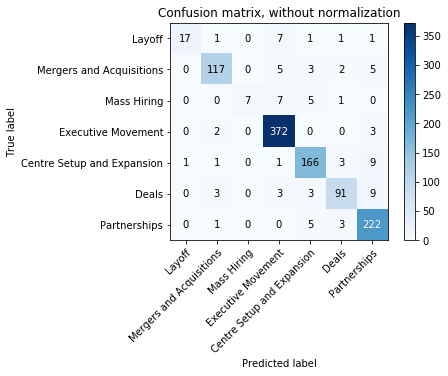

In [21]:
plot_confusion_matrix(y_test, pred, classes = categories['category'])

## Predict Function

In [20]:
def predict(content):
    text = content['title'].str.cat(content['snippet'], na_rep = '', sep = '\n').str.cat(content['news_description'], na_rep = '', sep = '\n')
    pred = pipeline3.predict(text)
    return categories.loc[pred - 1, 'category'].to_list()

In [21]:
predict(new_article.iloc[0:10])

['Executive Movement',
 'Executive Movement',
 'Mergers and Acquisitions',
 'Centre Setup and Expansion',
 'Partnerships',
 'Partnerships',
 'Partnerships',
 'Partnerships',
 'Executive Movement',
 'Executive Movement']